## Structural Econometrics - Assignment 1 Tutorial
## Author: Jaepil Lee
## October 21, 2021

### [Preliminary: Beta Distribution and Conjugate Prior](#preliminary)<a name="preliminary_menu"></a>
### [Static Problem](#static)<a name="static_menu"></a>
### [Dynamic Problem: 2 periods](#dynamic2periods)<a name="dynamic2_menu"></a>
### [Dynamic Problem: Infinite horizon](#dynamic_infty)<a name="dynamic_infty_menu"></a>

The model in this assignment is summarized as follows:
- Time horizon: $t=1,\ldots,T$ where $T\leq\infty$.
- Choice variable: $d_t=\begin{cases}
    0 & \text{ if `do the outside option'} \\ 
    1 & \text{ if `invent'} 
    \end{cases}$
- Outcome of invention: $x_t=\begin{cases}
    0 & \text{ if `failure'} \\ 
    1 & \text{ if `success'} 
    \end{cases}$
- Payoff of success is 1, failure is 0.
- The payoff of choosing the outside option: $w$
- Ability parameter: $\xi\in(0,1)$
- The agent knows that the ability $\xi\sim\text{Beta}(\gamma,\delta)$.
- Lifetime utility: $\sum_{t=1}^{T} \beta^{t-1} [d_t\mathbf{1} \{x_t=1\} + (1-d_t)w]$
- *Implied* assumption: the agent is risk neutral (i.e., expected payoff maximizer).

## [Preliminary: Beta Distribution and Conjugate Prior](#preliminary_menu)<a name="preliminary"></a>

Suppose $\xi\sim\text{Beta}(\gamma, \delta)$. Then we have the following properties:
- pdf: $g(\xi;\gamma,\delta) = \frac{\xi^{\gamma-1} (1-\xi)^{\delta-1}}{\text{B}(\gamma,\delta)}$ where $\text{B}(\gamma,\delta)=\int_{0}^{1} u^{\gamma-1}(1-u)^{\delta-1}du$
- Mean: $\mathbb{E}(\xi;\gamma,\delta) = \frac{\gamma}{\gamma+\delta}$
- Intuition: "$\gamma$ successes, $\delta$ failures"
- For more information: [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution)

If the agent invents, she will get the result of inventing, either success or failure. Based on the result, she will update her belief about her ability by updating her parameters $(\gamma, \delta)$ via [Bayes' rule](https://en.wikipedia.org/wiki/Bayesian_inference).

Statisticians found many cases where the prior distribution and posterior distribution are in the same distribution family after Bayesian update. The prior distribution in this case is called a [conjugate prior](https://en.wikipedia.org/wiki/Conjugate_prior) for the likelihood function. In Miller (1984), the conjugate prior is a normal distribution and the likelihood is also a normal distribution. In this assignment, the conjugate prior is a beta distribution and the likelihood is a Bernoulli distribution.

The prior distribution of $\xi$ given parameters $(\gamma, \delta)$ is
$$
g(\xi;\gamma,\delta)=\frac{\xi^{\gamma-1} (1-\xi)^{\delta-1}}{\text{B}(\gamma,\delta)} \text{ where }  \text{B}(\gamma,\delta)=\int_{0}^{1} u^{\gamma-1}(1-u)^{\delta-1}du
$$
and the likelihood of the outcome $x\in\{0,1\}$ given $\xi$ is
$$
    f(x\,|\,\xi)= \xi^{x} (1-\xi)^{1-x}.
$$
The agent's posterior belief is derived by using Bayes' rule:
$$
\begin{split}
    f(\xi|x)& =\frac{f(x|\xi)}{f(x)}g(\xi)=\frac{f(x|\xi)}{\int_{0}^{1}f(x|\xi)g(\xi)d\xi}g(\xi)= \frac{\xi^{x}(1-\xi)^{1-x}}{\int_{0}^{1}\xi^{x}(1-\xi)^{1-x}\frac{{\xi}^{\gamma-1}(1-\xi)^{\delta-1}}{\text{B}(\gamma,\delta)}d\xi}\frac{\xi^{\gamma-1}(1-\xi)^{\delta-1}}{\text{B}(\gamma,\delta)}\\
    & = \frac{\xi^{\gamma+x-1}(1-\xi)^{\delta+(1-x)-1}}{\int_{0}^{1}\xi^{\gamma+x-1}(1-\xi)^{\delta+(1-x)-1}d\xi}= \frac{\xi^{\gamma+x-1}(1-\xi)^{\delta+(1-x)-1}}{\text{B}(\gamma+x,\delta+(1-x))}
\end{split}
$$
Therefore, the agent's updated belief about her ability follows a beta distribution with parameters $(\gamma+x,\delta+(1-x))$.

The updated expected payoff is then:
$$
\mathbb{E}[\mathbf{1}\{x'=1\}|\gamma',\delta'] = \frac{\gamma'}{\gamma' + \delta'} = 
    \begin{cases}
        \frac{\gamma}{\gamma + (\delta+1)} & \text{ if } x=0\\
        \frac{\gamma+1}{(\gamma+1) + \delta} & \text{ if } x=1
    \end{cases}
$$
If the agent chooses not to invent, then there will be no update on her parameters (there is no information to update the parameters). Thus, the agent's belief about her ability in the next period will still be  $\xi \sim \text{Beta}(\gamma, \delta)$. i.e., the agent solves the recursive problem in the next period with the same parameters.

## [Static problem](#static_menu)<a name="static"></a>

Let's start with a simple setting. Let's suppose that we are solving a static model. In this case the lifetime utility is 
$$d_t\mathbf{1} \{x_t=1\} + (1-d_t)w.$$

If we knew the **exact value** of $\xi$, then the decision rule is simple: we choose to invent if the expected payoff of invention is larger than the payoff of the outside option given $\xi$:
$$
\mathbb{E}_{x}\big[1\cdot\mathbf{1}\{x=1\}+0\cdot\mathbf{1}\{x=0\}|\xi]=1\cdot\mathbb{P}(x=1|\xi) + 0\cdot\mathbb{P}(x=0|\xi) = \xi.
$$
In this case, the decision rule would be: 
$$d_t=\begin{cases} 1 &\text{ if } \xi>w \\ 
0  &\text{ otherwise } \end{cases}$$

However, the agent only knows that her ability $\xi$ is a random draw from a beta distribution $\text{Beta}(\gamma,\delta)$, not its exact value. As a risk-neutral agent, the agent would compute her expected return on inventing and decide whether it is worth trying or not.
$$
\mathbb{E}_{\xi} \Big[\mathbb{E}_{x} \big[ \mathbf{1}\{x=1\} \big| \xi \big] \Big|\gamma,\delta\Big] =\mathbb{E}_{\xi} \big[1 \cdot \mathbb{P}(x=1|\xi) + 0 \cdot \mathbb{P}(x=0|\xi) \big| \gamma,\delta \big] =\mathbb{E}_{\xi} [1 \cdot \xi + 0 \cdot (1-\xi) | \gamma,\delta] = \mathbb{E}_{\xi}[{\xi}|\gamma,\delta]=\frac{\gamma}{\gamma+\delta}.
$$
The decision rule is then:
$$
d_t=\begin{cases} 1 &\text{ if } \frac{\gamma}{\gamma+\delta}>w \\ 
0  &\text{ otherwise } \end{cases}
$$

Let's make simulated data of $N$ agents with this decision rule!

In [ ]:
# For REPL setting
ENV["LINES"] = 1000; ENV["COLUMNS"] = 250;
## In Julia, you can activate virtual environment you compiled in REPL
using Pkg; Pkg.activate("./")
using Distributed;
addprocs(7; exeflags=`--project=$(Base.active_project())`); # choose "the number of CPU's -1"
@everywhere begin 
    using SharedArrays, LinearAlgebra, Optim, ForwardDiff, NLSolversBase, Ipopt, Zygote,
        DataFrames, Printf, Random, Distributions, Statistics, HypothesisTests, TimeSeries, SharedArrays,
        Distances, Plots, Printf, LaTeXStrings, PlotThemes, .MathConstants; # for γ=0.5772...
end
#=
Distributed.jl is used for parallelization
@everywhere is a macro to tell all the processors do the commands that follow
@distributed is a macro to tell all the processors share the work on the loop
SharedArrays{T} type is a type of Arrays that multiple processors can have access
@sync is a macro to tell the processors do the loop in a synchronized manner
=#

In [2]:
Random.seed!(42) # random number generator for replicability
function simulation_static(γ, δ, w, N)
    γData = zeros(N);
    δData = zeros(N);
    dData = zeros(N);
    xData = zeros(N);
    function d_static(γ,δ,w)
        # Decision rule in a static case
        if γ/(γ+δ)>w
            return 1
        else
            return 0
        end
    end;
    # Flip a coin for each agent 'i' whose probability of success is ξ[i].
    # We record the result of inventing in xData. 0 in this case means either:
    #   i)  the agent tried inventing and failed, or
    #   ii) the agent did not try inventing. We need to look at dData to see why we observe 0 here.
    # '.' broadcasts operations element-wise. 
    # Read https://julia.quantecon.org/getting_started_julia/julia_by_example.html for details.
    γData .= γ;
    δData .= δ;
    dData  = d_static.(γData,δData,w);
    ξ = rand(Beta(γ,δ),N) # Draw a random number ξ ~ Beta(γ,δ) N-times.
    xData = rand.(Bernoulli.(ξ)) .* dData;
    @printf("γ=%4.2f, δ=%4.2f, w=%4.2f", γ, δ, w);
    @printf(", N=%4.0f, d=1: %5.0f, x=1: %5.0f \n", N,sum(dData),sum(xData))
end
simulation_static(3.0,1.0,0.65,10_000)
simulation_static(3.0,1.0,0.85,10_000)

γ=3.00, δ=1.00, w=0.65, N=10000, d=1: 10000, x=1:  7432 
γ=3.00, δ=1.00, w=0.85, N=10000, d=1:     0, x=1:     0 


By now, you might have noticed that in the static case, everyone makes the same choice! This is because in the first period, everyone has the same belief about their ability. As agents try out inventing and finds more about their ability, we will see that people making different choices.

Given the data where everyone making the same choice (i.e., all zeros or all ones), we cannot point-identify **any** parameter of the set of parameters $(\gamma,\delta,w)$. Let's take a step back and look at the decision rule: 
$$
d_t=\begin{cases} 1 &\text{ if } \frac{\gamma}{\gamma+\delta}>w \\ 
0  &\text{ otherwise } \end{cases}
$$
- If we are given the true value of one of $(\gamma,\delta,w)$, can you find the exact values for the rest of parameters? No. 
  - For example, let's say we are given $w=42$. What are the values of $\gamma$ and $\delta$ that can generate the data we have? All $(\gamma,\delta)$ that satisfy $\frac{\gamma}{\gamma+\delta}>42$.
  - Since we have only one inequality and two parameters, we cannot point-identify $\gamma$ and $\delta$.
- What if we are given two parameter values from $(\gamma,\delta,w)$? Can we point-identify the only left parameter? 
  - Again, as we are given an inequality, we can only find some bounds on the parameter we wish to identify. 
  - For example, if we are given $\gamma=3$ and $\delta=1$, then any $w$ that satisfies $\frac{\gamma}{\gamma+\delta}=\frac{3}{4}>w$ can generate the same data.

## [Dynamic Problem: 2 Periods](#dynamic2_menu)<a name="dynamic2periods"></a>

Let's solve the two-period model. The lifetime utility is now $\sum_{t=1}^{2} \beta^{t-1} [d_t\mathbf{1} \{x_t=1\} + (1-d_t)w]$. The state variables in each period are $(\gamma_t,\delta_t,w,t,\beta)$.

Let's solve this model by backward induction. At $t=2$, the agent observes $(\gamma_{2},\delta_{2},w,2,\beta)$ and solves
$$
\underset{d_{2}\in\{0,1\}}{\max}\;\mathbb{E}_{\xi_2}\Big[\mathbb{E}_{x_2}\big[d_2\mathbf{1} \{x_2=1\} + (1-d_2)w\big|\xi_2\big]\Big|\gamma_2,\delta_2\Big].
$$
It is straightforward that at $t=2$, the agent will choose to invent whenever the expected payoff of inventing is higher than choosing the outside option. We also derived that $\mathbb{E}_{\xi_2}\Big[\mathbb{E}_{x_2}\big[\mathbf{1}\{x_{2}=1\}\big|\xi_2\big]\Big|\gamma_2,\delta_2\Big] = \frac{\gamma_2}{\gamma_2 + \delta_2}$. Thus, the decision rule at $t=2$ becomes:
$$\begin{align*} 
    d_{2}(\gamma_2,\delta_2,w)=\begin{cases}
        1 & \text{if } \frac{\gamma_2}{\gamma_2 + \delta_2}> w\\
        0 & \text{if } \frac{\gamma_2}{\gamma_2 + \delta_2}\leq w
    \end{cases} = \mathbf{1}\left\{\frac{\gamma_2}{\gamma_2 + \delta_2}> w\right\}.
\end{align*}$$

Plugging the decision rule into the maximization problem, the expected value function at $t=2$ becomes:
$$\begin{align*} 
    V(\gamma_2,\delta_2,w,2,\beta) &= \underset{d_{2}\in\{0,1\}}{\max}\;\mathbb{E}_{\xi_2}\Big[\mathbb{E}_{x_2}\big[d_2\mathbf{1} \{x_2=1\} + (1-d_2)w\big|\xi_2\big]\Big|\gamma_2,\delta_2\Big] \\
    &= d_2(\gamma_2,\delta_2,w)\mathbb{E}_{\xi_2}\Big[\mathbb{E}_{x_2}\big[\mathbf{1}\{x_{2}=1\}\big|\xi_2 \big]\Big|\gamma_2,\delta_2\Big] + (1-d_2(\gamma_2,\delta_2,w))w \\
    &= d_2(\gamma_2,\delta_2,w)\frac{\gamma_2}{\gamma_2+\delta_2} + (1-d_2(\gamma_2,\delta_2,w))w \\
    &= \mathbf{1}\left\{\frac{\gamma_2}{\gamma_2 + \delta_2}> w\right\} \frac{\gamma_2}{\gamma_2+\delta_2} + \left(1-\mathbf{1}\left\{\frac{\gamma_2}{\gamma_2 + \delta_2}> w\right\}\right) w
\end{align*}$$

Knowing the decision rule $d_{2}(\gamma_2,\delta_2,w)$, we can solve for the agent's choice at $t=1$. At $t=1$, the agent maximizes her expectation of the discounted present value of the lifetime payoff:
$$
\begin{align*}
    V(\gamma_1,\delta_1,w,1,\beta) = \underset{d_{1}\in\{0,1\}}{\max}\; \mathbb{E}_{\xi_1}\Big[&\mathbb{E}_{x_1}[d_1\mathbf{1}\{x_{1}=1\}+(1-d_{1})w|\xi_1\big]\Big|\gamma_1,\delta_1\Big] \\
    +\beta \Bigg(&d_1\mathbb{E}_{\xi_1}\Big[\mathbb{E}_{x_1}\Big[\mathbf{1}\{x_1=0|\gamma_1,\delta_1\}V(\gamma_2,\delta_2,w,2)\Big|\xi_1\Big]\Big|\gamma_1,\delta_1\Big]+\\
                 &d_1\mathbb{E}_{\xi_1}\Big[\mathbb{E}_{x_1}\Big[\mathbf{1}\{x_1=1|\gamma_1,\delta_1\}V(\gamma_2,\delta_2,w,2)\Big|\xi_1\Big]\Big|\gamma_1,\delta_1\Big]+\\
                 &(1-d_1)V(\gamma_2,\delta_2,w,2)\Bigg)
\end{align*}
$$
where $(\gamma_2,\delta_2)$ are updated by the following rule:
$$
\begin{align*}
    (\gamma_2,\delta_2) = \begin{cases}
        (\gamma_1+1, \delta_1) &\text{if } d_1=1, x_1 =1\\
        (\gamma_1, \delta_1+1) &\text{if } d_1=1, x_1 =0 \\
        (\gamma_1, \delta_1) &\text{if } d_1=0
    \end{cases}.
\end{align*}
$$

Noting that $\mathbb{E}_{\xi_1}[\mathbb{P}[x_1=1|\xi_1]\big|\gamma,\delta]=\frac{\gamma}{\gamma+\delta}$ and $\mathbb{E}_{\xi_1}[\mathbb{P}[x_1=0|\xi_1]\big|\gamma,\delta]=\frac{\delta}{\gamma+\delta}$, we rewrite the value function as:
$$
\begin{equation*}
\begin{split}
    V(\gamma,\delta,w,1,\beta) = \underset{d_{1}}{\max}\; d_{1}\frac{\gamma}{\gamma+\delta}+(1-d_{1})w +\beta \left[d_1\frac{\gamma}{\gamma+\delta}V(\gamma+1,\delta,w,2)+d_1\frac{\delta}{\gamma+\delta}V(\gamma,\delta+1,w,2)+(1-d_1)V(\gamma,\delta,w,2)\right]
\end{split}
\end{equation*}
$$

Finally, we use $V(\gamma_2,\delta_2,w,2,\beta)=\mathbf{1}\left\{\frac{\gamma_2}{\gamma_2 + \delta_2}> w\right\}\cdot \frac{\gamma_2}{\gamma_2+\delta_2} + \left(1-\mathbf{1}\left\{\frac{\gamma_2}{\gamma_2 + \delta_2}> w\right\}\right)\cdot w$ to find the expression for $V(\gamma,\delta,w,1,\beta)$ with only $\gamma,\delta,w$, and $d_1$:
$$
\begin{align*}
    V(\gamma,\delta,w,1,\beta) = \max_{d_{1}} \; d_{1}\frac{\gamma}{\gamma+\delta}+(1-d_{1})w + \beta\bigg[&d_1\frac{\gamma}{\gamma+\delta}\left(\mathbf{1}\left\{\frac{\gamma+1}{\gamma+\delta+1}> w\right\} \frac{\gamma+1}{\gamma+\delta+1} + \mathbf{1}\left\{\frac{\gamma+1}{\gamma + \delta +1}\leq w\right\} w\right)+\\
    &d_1\frac{\delta}{\gamma+\delta}\left(\mathbf{1}\left\{\frac{\gamma}{\gamma + \delta +1}>w\right\} \frac{\gamma}{\gamma+\delta+1} + \mathbf{1}\left\{\frac{\gamma}{\gamma+\delta+1}\leq w\right\} w\right)+\\
    &(1-d_1)\left(\mathbf{1}\left\{\frac{\gamma}{\gamma + \delta}> w\right\} \frac{\gamma}{\gamma+\delta} + \mathbf{1}\left\{\frac{\gamma}{\gamma + \delta}\leq w\right\} w\right)\bigg]
\end{align*}
$$

Side note: we could write in this way only because we had two periods. If you have more than two periods you may want to prepare a mapping from a state space to the decision for each period. In this case, storing a function $d_t=\mathbf{1}(\gamma,\delta,w,t)$ in a discretized state space for each time period $t$ may be necessary. If you have an infinite horizon, the dimension for time goes away and you may only need to find $d = \mathbf{1}(\gamma,\delta,w)$, which we shall see later.

Can you find $w^*$, the upper bound of $w$, that ensures for every $w<w^*$, everyone invents in the first period? From the optimization problem in the first period, $d_1=1$ if the value of the value function when choosing $d_1=1$ is larger than or equal to that when choosing $d_1=0$:
$$
\begin{aligned}
    \frac{\gamma}{\gamma+\delta}+\beta\bigg[ &\frac{\gamma}{\gamma+\delta}\left(\mathbf{1}\left\{\frac{\gamma+1}{\gamma+\delta+1}> w\right\} \frac{\gamma+1}{\gamma+\delta+1} + \mathbf{1}\left\{\frac{\gamma+1}{\gamma + \delta +1}\leq w\right\} w\right)+ \\
    &\frac{\delta}{\gamma+\delta}\left(\mathbf{1}\left\{\frac{\gamma}{\gamma + \delta +1}> w\right\} \frac{\gamma}{\gamma+\delta+1} + \mathbf{1}\left\{\frac{\gamma}{\gamma+\delta+1}\leq w\right\} w\right)\bigg] \\
    &\geq w+\beta\left(\mathbf{1}\left\{\frac{\gamma}{\gamma + \delta}> w\right\} \frac{\gamma}{\gamma+\delta} + \mathbf{1}\left\{\frac{\gamma}{\gamma + \delta}\leq w\right\} w\right)
\end{aligned}
$$

$w$ is compared to three quantities $\frac{\gamma}{\gamma+\delta}$,$\frac{\gamma+1}{\gamma+\delta+1}$, $\frac{\gamma}{\gamma+\delta+1}$ inside the indicator functions. It is clear that $\frac{\gamma}{\gamma+\delta+1}<\frac{\gamma}{\gamma+\delta}<\frac{\gamma+1}{\gamma+\delta+1}$. Thus, we have four cases to consider:

1. $w<\frac{\gamma}{\gamma+\delta+1}<\frac{\gamma}{\gamma+\delta}<\frac{\gamma+1}{\gamma+\delta+1}$
1. $\frac{\gamma}{\gamma+\delta+1}\leq w<\frac{\gamma}{\gamma+\delta}<\frac{\gamma+1}{\gamma+\delta+1}$
1. $\frac{\gamma}{\gamma+\delta+1}<\frac{\gamma}{\gamma+\delta}\leq w<\frac{\gamma+1}{\gamma+\delta+1}$
1. $\frac{\gamma}{\gamma+\delta+1}<\frac{\gamma}{\gamma+\delta}<\frac{\gamma+1}{\gamma+\delta+1}\leq w$

1. $w<\frac{\gamma}{\gamma+\delta+1}<\frac{\gamma}{\gamma+\delta}<\frac{\gamma+1}{\gamma+\delta+1}$
    The following shows the values for indicator functions:
    $$
    \begin{align*}
    \mathbf{1}\left\{\frac{\gamma+1}{\gamma+\delta+1}> w\right\}=1 &\text{ and } \mathbf{1}\left\{\frac{\gamma+1}{\gamma + \delta +1}\leq w\right\}=0,\\
    \mathbf{1}\left\{\frac{\gamma}{\gamma + \delta +1}> w\right\}=1 &\text{ and } \mathbf{1}\left\{\frac{\gamma}{\gamma+\delta+1}\leq w\right\}=0,\\
    \mathbf{1}\left\{\frac{\gamma}{\gamma + \delta}> w\right\}=1 &\text{ and } \mathbf{1}\left\{\frac{\gamma}{\gamma + \delta} \leq w \right\}=0
    \end{align*}
    $$
    Plugging these values into the inequality above, $d_1=1$ if:
    $$
    \begin{align*}
    \frac{\gamma}{\gamma+\delta}+\beta\bigg[\frac{\gamma}{\gamma+\delta}\frac{\gamma+1}{\gamma+\delta+1}+\frac{\delta}{\gamma+\delta}\frac{\gamma}{\gamma+\delta+1}\bigg] &\geq w+\beta\bigg[\frac{\gamma}{\gamma+\delta}\bigg]\\
    \frac{\gamma}{\gamma+\delta}&\geq w
    \end{align*}
    $$
    Thus, if $w<\frac{\gamma}{\gamma+\delta+1}<\frac{\gamma}{\gamma+\delta}$, everyone will choose to invent.

1. $\frac{\gamma}{\gamma+\delta+1}\leq w<\frac{\gamma}{\gamma+\delta}<\frac{\gamma+1}{\gamma+\delta+1}$
    The following show the values for indicator functions:
    $$
    \begin{align*}
    \mathbf{1}\left\{\frac{\gamma+1}{\gamma+\delta+1}> w\right\}=1 &\text{ and } \mathbf{1}\left\{\frac{\gamma+1}{\gamma + \delta +1}\leq w\right\}=0,\\
    \mathbf{1}\left\{\frac{\gamma}{\gamma + \delta +1}> w\right\}=0 &\text{ and } \mathbf{1}\left\{\frac{\gamma}{\gamma+\delta+1}\leq w\right\}=1,\\
    \mathbf{1}\left\{\frac{\gamma}{\gamma + \delta}> w\right\}=1 &\text{ and } \mathbf{1}\left\{\frac{\gamma}{\gamma + \delta} \leq w \right\}=0
    \end{align*}
    $$
    Plugging these values into the inequality above, $d_1=1$ if:
    $$
    \begin{align*}
    \frac{\gamma}{\gamma+\delta}+\beta\bigg[\frac{\gamma}{\gamma+\delta}\frac{\gamma+1}{\gamma+\delta+1}+\frac{\delta}{\gamma+\delta}w\bigg]&\geq w+\beta\bigg[\frac{\gamma}{\gamma+\delta}\bigg]\\
    \frac{\gamma}{\gamma+\delta}\frac{1-\frac{\beta\delta}{\gamma+\delta+1}}{1-\frac{\beta\delta}{\gamma+\delta}}&\geq w
    \end{align*}
    $$
    Thus, everyone will choose to invent if $\frac{\gamma}{\gamma+\delta+1}\leq w<\min\{\frac{\gamma}{\gamma+\delta},\frac{\gamma}{\gamma+\delta}\frac{1-\frac{\beta\delta}{\gamma+\delta+1}}{1-\frac{\beta\delta}{\gamma+\delta}}\}=\frac{\gamma}{\gamma+\delta}$

1. $\frac{\gamma}{\gamma+\delta+1}<\frac{\gamma}{\gamma+\delta}\leq w<\frac{\gamma+1}{\gamma+\delta+1}$
    The following show the values for indicator functions:
    $$
    \begin{align*}
    \mathbf{1}\left\{\frac{\gamma+1}{\gamma+\delta+1}> w\right\}=1 &\text{ and } \mathbf{1}\left\{\frac{\gamma+1}{\gamma + \delta +1}\leq w\right\}=0,\\
    \mathbf{1}\left\{\frac{\gamma}{\gamma + \delta +1}> w\right\}=0 &\text{ and } \mathbf{1}\left\{\frac{\gamma}{\gamma+\delta+1}\leq w\right\}=1,\\
    \mathbf{1}\left\{\frac{\gamma}{\gamma + \delta}> w\right\}=0 &\text{ and } \mathbf{1}\left\{\frac{\gamma}{\gamma + \delta} \leq w \right\}=1
    \end{align*}
    $$
    Plugging these values into the inequality above, $d_1=1$ if:
    $$
    \begin{align*}
    \frac{\gamma}{\gamma+\delta}+\beta\bigg[ \frac{\gamma}{\gamma+\delta} \frac{\gamma+1}{\gamma+\delta+1} +\frac{\delta}{\gamma+\delta}  w \bigg] &\geq w+\beta w \\
    \frac{\gamma}{\gamma+\delta}\frac{1+\beta\frac{\gamma+1}{\gamma+\delta+1}}{1+\beta\frac{\gamma}{\gamma+\delta}}&\geq w
    \end{align*}
    $$
    Thus, everyone will choose to invent if $\frac{\gamma}{\gamma+\delta}\leq w<\min\{\frac{\gamma+1}{\gamma+\delta+1},\frac{\gamma}{\gamma+\delta}\frac{1+\beta\frac{\gamma+1}{\gamma+\delta+1}}{1+\beta\frac{\gamma}{\gamma+\delta}}\}=\frac{\gamma}{\gamma+\delta}\frac{1+\beta\frac{\gamma+1}{\gamma+\delta+1}}{1+\beta\frac{\gamma}{\gamma+\delta}}$

1. $\frac{\gamma}{\gamma+\delta+1}<\frac{\gamma}{\gamma+\delta}<\frac{\gamma+1}{\gamma+\delta+1}\leq w$
    The following show the values for indicator functions:
    $$
    \begin{align*}
    \mathbf{1}\left\{\frac{\gamma+1}{\gamma+\delta+1}> w\right\}=0 &\text{ and } \mathbf{1}\left\{\frac{\gamma+1}{\gamma + \delta +1}\leq w\right\}=1,\\
    \mathbf{1}\left\{\frac{\gamma}{\gamma + \delta +1}> w\right\}=0 &\text{ and } \mathbf{1}\left\{\frac{\gamma}{\gamma+\delta+1}\leq w\right\}=1,\\
    \mathbf{1}\left\{\frac{\gamma}{\gamma + \delta}> w\right\}=0 &\text{ and } \mathbf{1}\left\{\frac{\gamma}{\gamma + \delta} \leq w \right\}=1
    \end{align*}
    $$
    Plugging these values into the inequality above, $d_1=1$ if:
    $$
    \begin{align*}
    \frac{\gamma}{\gamma+\delta}+\beta\bigg[\frac{\gamma}{\gamma+\delta}w + \frac{\delta}{\gamma+\delta} w \bigg] &\geq 
    w+\beta w \\
    \frac{\gamma}{\gamma+\delta} &\geq w
    \end{align*}
    $$
    We have contradiction: $\frac{\gamma}{\gamma+\delta+1}<w$ and $\frac{\gamma}{\gamma+\delta} \geq w$. Thus, there is no $w$ that can make everyone choose $d_1=1$ if $\frac{\gamma}{\gamma+\delta+1}<\frac{\gamma}{\gamma+\delta}<\frac{\gamma+1}{\gamma+\delta+1}\leq w$.

To sum up, everyone will choose to invent at $t=1$ if $w<\frac{\gamma}{\gamma+\delta}\frac{1+\beta\frac{\gamma+1}{\gamma+\delta+1}}{1+\beta\frac{\gamma}{\gamma+\delta}}=w^*$.

Let's code what we discussed so far. Instead of writing a bunch of indicator functions, I want to be lazy here and tell the program to find out the decision rule to the maximization problem on its own via backward induction. This is convenient because this allows us to easily extend the program to a finite horizon model with any size $T$.

We start from the last period, $t=2$. In this period, we do not have any continuation value to think about; the maximization problem only has today's per-period utility. The value function and the policy function here are straightforward:
$$
\begin{aligned}
    V(\gamma,\delta,w,2,\beta) &= \underset{d\in\{0,1\}}{\max} \quad\; d \frac{\gamma}{\gamma+\delta}+ (1-d) w\\
    d(\gamma,\delta,w,2,\beta) &= \underset{d\in\{0,1\}}{\arg\max} \; d \frac{\gamma}{\gamma+\delta}+ (1-d) w\\
\end{aligned}
$$
The policy function and the value function at $t=1$ simply take the value function and the policy function we found at $t=2$ and return the solution and the maximized value to the maximization problem:
$$
\begin{aligned}
    V(\gamma,\delta,w,1,\beta) = \underset{d\in\{0,1\}}{\max} &d \frac{\gamma}{\gamma+\delta}+ (1-d) w + \beta \Bigg(d\left(\frac{\gamma}{\gamma+\delta} V(\gamma+1,\delta,w,2,\beta)+ \frac{\delta}{\gamma+\delta} V(\gamma,\delta+1,w,2,\beta) \right) + (1-d) V(\gamma,\delta,w,2,\beta)\Bigg) \\
    d(\gamma,\delta,w,1,\beta) = \underset{d\in\{0,1\}}{\arg\max} &d \frac{\gamma}{\gamma+\delta}+ (1-d) w + \beta \Bigg(d\left(\frac{\gamma}{\gamma+\delta} V(\gamma+1,\delta,w,2,\beta)+ \frac{\delta}{\gamma+\delta} V(\gamma,\delta+1,w,2,\beta) \right) + (1-d) V(\gamma,\delta,w,2,\beta)\Bigg) \\
\end{aligned}
$$

Side note: you can "solve and take note of" the solution to the model by telling the program to return the decision at $t$ given state variables $(\gamma,\delta,w,\beta)$ and store them in `DataFrames` or in an `Array` (memoization) while doing backward induction. I will not do that here because the computation is cheap in our case. You may want to do this when the state space or time horizon becomes large.

Generating data based on this decision is also simple. 
- Set the number of agents $N$ and the initial state $(\gamma,\delta,w,\beta)$. 
- Draw $\xi$ from a Beta distribution $\text{Beta}(\gamma,\delta)$ for each agent. 
- We ask the program what is the optimal decision for the agent with $(\gamma,\delta,w,\beta)$ at $t=1$. In our model, everyone will make the same decision and so let's give the initial state so that everyone invents.
- We store each agent's success/failure of inventing (we saw this in the static case). 
- We update the agents' belief about their ability. 
- We ask the program what is the optimal decision for the agent with $(\gamma',\delta',w,\beta)$ at $t=2$ where $(\gamma',\delta',)$ are the updated beliefs about their ability.
- Based on their optimal decision, let the agents invent or choose the outside option. 
- Store the result of invention.

In [3]:
function u(j,γ,δ,w)
    # Per-period utility function
    return j * γ/(γ+δ) + (1-j) * w
end

function Val_2(γ,δ,w,t,β)
    # The value function for the two-period model
    # findmin(itr)[1] returns maximum value
    if t==2
        return findmax([u(j,γ,δ,w) for j=0:1])[1]
    else
        return findmax([u(j,γ,δ,w) + β*(j*(γ/(γ+δ) * Val_2(γ+1,δ,w,t+1,β) + δ/(γ+δ) * Val_2(γ,δ+1,w,t+1,β))+
                                        (1-j)*Val_2(γ,δ,w,t+1,β)) for j=0:1])[1]
    end
end

function d_dyn_2(γ,δ,w,t,β)
    # The policy function for the two-period model
    # findmin(itr)[2] is argmax. "-1" is there to match the index in Julia (1,2) to our choice index (0,1)
    if t==2
        return findmax([u(j,γ,δ,w) for j=0:1])[2]-1 
    else
        return findmax([u(j,γ,δ,w) + β*(j*(γ/(γ+δ) * Val_2(γ+1,δ,w,t+1,β) + δ/(γ+δ) * Val_2(γ,δ+1,w,t+1,β))+
                                        (1-j)*Val_2(γ,δ,w,t+1,β)) for j=0:1])[2]-1
    end
end

function simul_data(N,T,γ,δ,w,β)
    # Data storage
    γData = zeros(N,T);
    δData = zeros(N,T);
    dData = zeros(N,T);
    xData = zeros(N,T);
    #=
    Again, everyone has different ξ, but each person retains ξ over time (i.e., no learning by doing).
    We only get to know 'how good we are' as we invent and observe outcomes.
    =#
    γData[:,1] .= γ;
    δData[:,1] .= δ;
    ξ = rand(Beta(γ,δ),N);
    #=
    broadcast() applies the function d_dyn_2 that takes 4 scalar arguments and
    applies it element-wise over the vectors γData[:,1] and δData[:,1]
    while fixing w,1,β as scalars.
    =#
    dData[:,1] = broadcast(d_dyn_2,γData[:,1],δData[:,1],w,1,β);
    xData[:,1] = rand.(Bernoulli.(ξ)) .* dData[:,1];
    for t=2:T
        γData[:,t] .= γData[:,t-1] + dData[:,t-1] .* (1 .* xData[:,t-1])
        δData[:,t] .= δData[:,t-1] + dData[:,t-1] .* (1 .* (1 .- xData[:,t-1]))
        dData[:,t] .= broadcast(d_dyn_2,γData[:,t],δData[:,t],w,t,β)
        xData[:,t] .= rand.(Bernoulli.(ξ)) .* dData[:,t];
    end
    return γData, δData, dData, xData, ξ
end;

We can use $w^*=\frac{\gamma}{\gamma+\delta}\frac{1+\beta\frac{\gamma+1}{\gamma+\delta+1}}{1+\beta\frac{\gamma}{\gamma+\delta}}$ and choice-specific conditional value function to check if our program is well-written. Choice-specific conditional value function is a discounted present value of lifetime utility if an agent commits to a certain choice today and behaves optimally in the periods that follow. In our case, there are two choice-specific conditional value functions at $t=1$:
$$
\begin{align*}
    v_0(\gamma,\delta,w,1,\beta) &= w + \beta V(\gamma,\delta,w,2,\beta) \\
    v_1(\gamma,\delta,w,1,\beta) &= \frac{\gamma}{\gamma+\delta}+ \beta \Bigg(\frac{\gamma}{\gamma+\delta} V(\gamma+1,\delta,w,2,\beta)+ \frac{\delta}{\gamma+\delta} V(\gamma,\delta+1,w,2,\beta) \Bigg)
\end{align*}
$$
We can put $w^*=\frac{\gamma}{\gamma+\delta}\frac{1+\beta\frac{\gamma+1}{\gamma+\delta+1}}{1+\beta\frac{\gamma}{\gamma+\delta}}$ to our choice-specific conditional value functions and check if they have the same value, which is precisely what we expect from the definition of $w^*$.

In [4]:
γ=2.3; δ=2.0; β=0.96;
w⃰ = (γ/(γ+δ))*(1+β*(γ+1)/(γ+δ+1))/(1+β*γ/(γ+δ))
cvf= [(u(j,γ,δ,w⃰) + β*(j*(γ/(γ+δ) * Val_2(γ+1,δ,w⃰,2,β) + δ/(γ+δ) * Val_2(γ,δ+1,w⃰,2,β))+(1-j)*Val_2(γ,δ,w⃰,2,β))) for j=0:1];

# Print CVF when w=w⃰
print("w⃰: ",w⃰,"\n")
print("Choice-specific Conditional Value Function at t=1 when γ=$γ, δ=$δ, β=$β, w=w⃰ \n")
@printf(" - v₀(γ,δ,w⃰,1,β) = %1.12f \n",cvf[1])
@printf(" - v₁(γ,δ,w⃰,1,β) = %1.12f",cvf[2])

w⃰: 0.5646577217010124
Choice-specific Conditional Value Function at t=1 when γ=2.3, δ=2.0, β=0.96, w=w⃰ 
 - v₀(γ,δ,w⃰,1,β) = 1.106729134534 
 - v₁(γ,δ,w⃰,1,β) = 1.106729134534

Let's suppose we only observe the agent's choice at $t = 2$. From the data, we can only talk about the fraction of agents quit inventing at $t=2$ condtional on the agents had tried inventing at $t=1$. Theoretically, we can think of the following cases:
$$
\begin{align*}
    \mathbb{P}(d_2=0|d_1=1)=\begin{cases}
        0 &\text{ if } w<w^* \text{ and } w<\frac{\gamma}{\gamma+\delta+1}  \\
        \alpha &\text{ if } w<w^* \text{ and } \frac{\gamma}{\gamma+\delta+1}<w \text{ where } \alpha\in(0,1) \\
        1 &\text{ if } w<w^* \text{ and } w>\frac{\gamma+1}{\gamma+\delta+1}
    \end{cases}
\end{align*}
$$

We can easily show that the third case is impossible. Thus, we consider two cases:
1. $\mathbb{P}(d_2=0|d_1=1)=0$; i.e., we only observe ones in the data.
    - This can happen if $w<w^*$ and $w<\frac{\gamma}{\gamma+\delta+1}$ (which implies $w<\frac{\gamma}{\gamma+\delta+1}$). We may only suggest some bounds to one of the parameters given specific values of the other parameters with this condition.
    - For example, if we know exact values of $\gamma$ and $\delta$, we can only say that $w$ is less than $\frac{\gamma}{\gamma+\delta+1}$. Even then, any values of $\beta\in(0,1)$ can generate the same data so we cannot identify $\beta$.
1. $\mathbb{P}(d_2=0|d_1=1)=\alpha$; i.e., we observe some zeros and some ones in the data.
    - This can happen if $w<w^*$ and $\frac{\gamma}{\gamma+\delta+1}<w$.
    - If we are given the exact values of all but one of $(\gamma,\delta,w,\beta)$, then how can we identify the remaining parameter?
        - If we are asked to identify either $\gamma$ or $\delta$, then we can use our knowledge that $\mathbb{E}[\mathbf{1}\{d_{2i}=1\}]=\frac{\gamma}{\gamma+\delta}$ (details below).
        - If we are asked to identify $w$ or $\beta$, we can only identify up to some bounds:
            - For $w$, we can only say that $\frac{\gamma}{\gamma+\delta+1}<w<\frac{\gamma}{\gamma+\delta}\frac{1+\beta\frac{\gamma+1}{\gamma+\delta+1}}{1+\beta\frac{\gamma}{\gamma+\delta}}$.
            - For $\beta$, we can only say that $w<\frac{\gamma}{\gamma+\delta}\frac{1+\beta\frac{\gamma+1}{\gamma+\delta+1}}{1+\beta\frac{\gamma}{\gamma+\delta}}$, i.e., $\frac{(\gamma+\delta+1)(w\gamma+w-\gamma)}{\gamma(\gamma+1-w(\gamma+\delta+1))}<\beta$.

Identifying $\gamma$ or $\delta$ is more interesting, so let's focus on identifying and estimating $\gamma$ via MLE. Let's suppose we are given $(\delta,w,\beta,\{d_{2i}\}_{i=1}^N)$ and are asked to identify and estimate $\gamma$. From the model, we know:
$$
    d_{2i}=\mathbf{1} \bigg\{ \mathbb{E}_{\xi_2}\bigg[\mathbb{E}_{x_2}\big[ \mathbf{1}\{x_2=1\}\big|\xi_2\big]\Big|\gamma,\delta,x_1 \bigg] > w \bigg\}
$$
i.e., $d_2$ is chosen by comparing the expected payoff of inventing which depends on our updated belief to the payoff of the outside option. The probability of observing $d_{2i}=1$, $\mathbb{E}[\mathbf{1}[d_{2i}=1]]$, is then:
$$
\begin{align*}
    \mathbb{E} \left[\mathbf{1}[d_{2i}=1]\right] =& \mathbb{E} \Bigg[\mathbf{1} \bigg\{ \mathbb{E}_{\xi_2}\Big[\mathbb{E}_{x_2}\big[ \mathbf{1}\{x_2=1\}\big|\xi_2\big]\Big|\gamma,\delta,x_1 \Big] > w \bigg\}\Bigg] = \mathbb{E} \bigg[ \mathbf{1} \Big\{ \mathbb{E}_{\xi_2}\big[ 1\cdot\xi_{2}+0\cdot(1-\xi_{2})\big|\gamma,\delta,x_1 \big] > w \Big\} \bigg] = \mathbb{P} \Big[ \mathbb{E}_{\xi_2} \big[\xi_{2};\gamma,\delta\big] > w \Big]\\
    =& \mathbb{P} \Big[ \mathbb{E}_{\xi_2}\big[\xi_{2};\gamma,\delta,x_1\big] > w \big| d_{1}=1, x_1=1 \Big] \cdot \mathbb{P} \Big[ d_{1}=1, x_1=1 \Big] + \mathbb{P} \Big[ \mathbb{E}_{\xi_2}\big[\xi_{2};\gamma,\delta,x_1\big] > w \big| d_{1}=1, x_1=0 \Big] \cdot \mathbb{P} \Big[ d_{1}=1, x_1=0 \Big] \\
    +& \mathbb{P} \Big[ \mathbb{E}_{\xi_2}\big[\xi_{2};\gamma,\delta,x_1\big] > w \big| d_{1}=0 \Big] \cdot \mathbb{P} \Big[ d_{1}=0 \Big]
\end{align*}
$$

We saw that $w<w^{*} \implies d_1=1$. Since we are considering a dataset where we guarantee agents to invent in the first period, we have $\mathbb{P}[d_1=0]=0.$ Thus, the following holds:
$$
\begin{align*}
    \mathbb{E} \left[\mathbf{1}[d_{2i}=1]\right] = &\mathbb{P} \Big[ \mathbb{E}_{\xi_2} \big[ \xi_{2}; \gamma,\delta,x_1 \big] \geq w \bigm| d_{1}=1, x_1=1 \Big] \cdot \mathbb{P} \Big[d_{1}=1, x_1=1 \Big]+ \mathbb{P} \Big[ \mathbb{E}_{\xi_2}\big[\xi_{2};\gamma,\delta,x_1\big] \geq w \bigm| d_{1}=1, x_1=0 \Big] \cdot \mathbb{P} \Big[d_{1}=1, x_1=0 \Big]\\
    = &\mathbb{P} \bigg[ \frac{\gamma+1}{\gamma+\delta+1} \geq w \bigg] \cdot  \frac{\gamma}{\gamma+\delta} + \mathbb{P} \bigg[ \frac{\gamma}{\gamma+\delta+1} \geq w \bigg] \cdot  \frac{\delta}{\gamma+\delta} = \frac{\gamma}{\gamma+\delta} \quad \because w<w^*<\frac{\gamma+1}{\gamma+\delta+1} \text{ and } \frac{\gamma}{\gamma+\delta+1}<w.
\end{align*}
$$

In words, we know that the agent would choose to invent in the second period if invention was successful in the first period. We also know that the probability of success follows a beta distribution $\text{Beta}(\gamma,\delta)$ with expected value $\frac{\gamma}{\gamma+\delta}$. Thus, the likelihood of observing an agent inventing in the second period given $(\gamma,\delta)$ is $\frac{\gamma}{\gamma+\delta}$.

The flipside of this argument is hazard rate at $t=2$. The probability of agent choosing to quit in the second period is $\frac{\delta}{\gamma+\delta}$. I suggest you use the similar reasoning I provided above and convince yourself that the hazard rate is indeed $\frac{\delta}{\gamma+\delta}$.

The discussion above motivates to construct the likelihood of $\{d_{i2}\}_{i=1}^{N}$ by:
$$
\begin{align*}
    \mathcal{L}(\gamma;\{d_{i2}\}_{i=1}^{N},\delta)=\prod_{i=1}^{N}\left(\frac{\gamma}{\gamma+\delta}\right)^{d_{i2}}\left(\frac{\delta}{\gamma+\delta}\right)^{1-d_{i2}}
\end{align*}
$$
The log-likelihood is
$$
\begin{align*}
    \log\mathcal{L}(\gamma;\{d_{i2}\}_{i=1}^{N},\delta)&=\sum_{i=1}^{N}\left(d_{i2}\log\left(\frac{\gamma}{\gamma+\delta}\right)+(1-d_{i2})\log\left(\frac{\delta}{\gamma+\delta}\right)\right)\\
    &=\sum_{i=1}^{N}\left(d_{i2}\left(\log\gamma-\log(\gamma+\delta)\right)+(1-d_{i2})\left(\log\delta-\log(\gamma+\delta)\right)\right)
\end{align*}
$$

Let's exploit that $\{d_{i2}\}_{i=1}^{N}$ are independent. The score function of a single observation $d_{i2}$ is
$$
\begin{align*}
    s(\gamma;d_{i2},\delta)=\frac{\partial}{\partial\gamma}\log f(\gamma;d_{i2},\delta)=d_{i2}\left(\frac{1}{\gamma}-\frac{1}{\gamma+\delta}\right)+(1-d_{i2})\left(-\frac{1}{\gamma+\delta}\right)
\end{align*}
$$
This gives us the derivative of the log-likelihood with respect to $\gamma$:
$$
\begin{align*}
    \frac{\partial}{\partial\gamma}\log \mathcal{L}(\gamma;\{d_{i2}\}_{i=1}^{N},\delta)=\sum_{i=1}^{N}\left(d_{i2}\left(\frac{1}{\gamma}-\frac{1}{\gamma+\delta}\right)+(1-d_{i2})\left(-\frac{1}{\gamma+\delta}\right)\right)
\end{align*}
$$

Setting above to zero and solve for $\gamma$ will give us the estimate of $\gamma$ via MLE:
$$
\begin{align*}
    \sum_{i=1}^{N}\left(d_{i2}\left(\frac{1}{\gamma}-\frac{1}{\gamma+\delta}\right)+(1-d_{i2})\left(-\frac{1}{\gamma+\delta}\right)\right) &= 0 \\
    \left(\frac{1}{\gamma}-\frac{1}{\gamma+\delta}\right)\sum_{i=1}^{N}d_{i2} -\frac{N}{\gamma+\delta} + \frac{1}{\gamma+\delta}\sum_{i=1}^{N}d_{i2}&= 0 \\
    \frac{1}{\gamma}\sum_{i=1}^{N}d_{i2} = \frac{N}{\gamma+\delta}&\\
    \therefore \hat{\gamma} = \frac{\delta\sum_{i=1}^{N}d_{i2}}{N-\sum_{i=1}^{N}d_{i2}}&
\end{align*}
$$

$\{d_{i2}\}_{i=1}^{N}$ are i.i.d. so I use the following theorem to compute the Fisher information:
$$
\begin{align*}
    I_{N}(\gamma)&=N\cdot I(\gamma)=-N\cdot \mathbb{E}_{\gamma}\left(\frac{\partial^2\log f(\gamma;d_{i2},\delta)}{\partial \gamma^2}\right)\\
    &=-N\cdot\mathbb{E}_{\gamma}\left( d_{i2}\left(-\frac{1}{\gamma^2}+\frac{1}{(\gamma+\delta)^2}\right)+(1-d_{i2})\left(\frac{1}{(\gamma+\delta)^2}\right)\right)\\
    &=-N\cdot\left(\left(-\frac{1}{\gamma^2}+\frac{1}{(\gamma+\delta)^2}\right)\frac{\gamma}{\gamma+\delta}+\left(\frac{1}{(\gamma+\delta)^2}\right)\frac{\delta}{\gamma+\delta}\right) \\
    &=\frac{N\delta}{\gamma(\gamma+\delta)^2}
\end{align*}
$$
Substituting $\gamma$ with $\hat{\gamma}$, we have asymptotic normality of the MLE as follows:
$$
\begin{align*}
    &\hat{se} = \sqrt{1/I_N(\hat{\gamma})}\\
    &\frac{\hat{\gamma}-\gamma}{\hat{se}} \xrightarrow{d} N(0,1)
\end{align*}
$$
Coding the likelihood and the estimation routine based on our derivation is straightforward:

In [5]:
function logLikelihood(γ,δ,dData)
    γ = γ[1]
    return -sum(dData[:,2].*(log(γ)-log(γ+δ)).+(1.0 .- dData[:,2]).*(log(δ)-log(γ+δ)))
end

function γ_estimation(δ,dData)
    N = size(dData)[1]
    γhat = (δ * sum(dData[:,2])) / (N-sum(dData[:,2]))
    I   = δ / (γhat * (γhat+δ))
    I_n = N * δ / (γhat*(γhat+δ)^2)
    se  = sqrt(1 / I_n)
    return γhat, se
end;

Code below shows the estimation result using various sample sizes. I also included using `Optim.jl`, a Julia package for various optimization routines to find the MLE estimate. As you can see, using `Optim.jl` returns the identical result as it should. Since analytically solving for the MLE as $T$ gets large in the finite horizon case or in the infinite horizon case is impossible, we will use `Optim.jl` in the next section.

In [6]:
Random.seed!(42)
T=2;γ=3.0;δ=2.0;w=0.55;β=0.96;
N_vec = [50,500,10_000,100_000,500_000]
result_2 = Array{Float64}(zeros(length(N_vec),2,2))
h_rate_2 = Vector{Float64}(zeros(length(N_vec)))
_, _, dData, _, _ = simul_data(N_vec[end],T,γ,δ,w,β);
for i=1:length(N_vec)
    N = N_vec[i]
    h_rate_2[i] = sum((dData[1:N,1].==1).&(dData[1:N,2].==0))/sum((dData[1:N,1].==1))
    result_2[i,1,1], result_2[i,1,2] = γ_estimation(δ,dData[1:N,:])
    # We can also use Optim.jl to tell the program to find the MLE estimate for us
    func = TwiceDifferentiable(x -> logLikelihood(x[1],δ,dData[1:N,:]),[1.0]);
    optim = optimize(func,[1.0])
    result_2[i,2,1] = optim.minimizer[1]
    result_2[i,2,2] = sqrt(inv(Optim.hessian!(func,optim.minimizer)))[1]
end

In [7]:
# Print MLE estimation results
print("---------------- Estimating γ in a Two-Period Model -----------------\n")
print("Parameters: γ=$γ, δ=$δ, w=$w, β=$β, T=$T \n")
@printf("Hazard Rate: Data vs Theory \n")
print("=====================================================================\n")
@printf("N     ||"); [@printf(" %7i |", i) for i in N_vec]; @printf("|  Theory |\n") 
@printf("h₂    ||"); [@printf(" %1.5f |", i) for i in h_rate_2[:]]; @printf("| %1.5f |\n",δ/(γ+δ))
print("=====================================================================\n")

@printf("Estimation Result for γ: \n")
print("=============================================================\n")
@printf("MLE \\ N  ||"); [@printf(" %7i |", i) for i in N_vec]; @printf("\n")
print("-------------------------------------------------------------\n")
@printf("By hand  ||"); [@printf(" %1.5f |", i) for i in result_2[:,1,1]]; @printf("\n")
@printf("         ||"); [@printf("(%1.5f)|", i) for i in result_2[:,1,2]]; @printf("\n")
print("-------------------------------------------------------------\n")
@printf("Optim.jl ||"); [@printf(" %1.5f |", i) for i in result_2[:,2,1]]; @printf("\n")
@printf("         ||"); [@printf("(%1.5f)|", i) for i in result_2[:,2,2]]; @printf("\n")
print("=============================================================\n")
@printf("Standard errors in parentheses.")

---------------- Estimating γ in a Two-Period Model -----------------
Parameters: γ=3.0, δ=2.0, w=0.55, β=0.96, T=2 
Hazard Rate: Data vs Theory 
N     ||      50 |     500 |   10000 |  100000 |  500000 ||  Theory |
h₂    || 0.34000 | 0.38800 | 0.40000 | 0.40192 | 0.40010 || 0.40000 |
Estimation Result for γ: 
MLE \ N  ||      50 |     500 |   10000 |  100000 |  500000 |
-------------------------------------------------------------
By hand  || 3.88235 | 3.15464 | 3.00000 | 2.97611 | 2.99870 |
         ||(1.15904)|(0.28952)|(0.06124)|(0.01920)|(0.00866)|
-------------------------------------------------------------
Optim.jl || 3.88235 | 3.15464 | 3.00000 | 2.97611 | 2.99870 |
         ||(1.15904)|(0.28952)|(0.06124)|(0.01920)|(0.00866)|
Standard errors in parentheses.

## [Dynamic Problem: Infinite Horizon](#dynamic_infty_menu)<a name="dynamic_infty"></a>

Suppose now that individuals live forever. The lifetime utility is now $\sum_{t=1}^{\infty}\beta^{t-1}(d_t\mathbf{1} \{x_t=1\} + (1-d_t)w)$.

We consider the Bellman representation:
$$
\begin{align*}
V(\gamma,\delta,w,\beta)=\underset{d\in\{0,1\}}{\max}\; d \frac{\gamma}{\gamma+\delta} + (1-d)w + \beta \left(d\left(\frac{\gamma}{\gamma+\delta}V(\gamma+1,\delta,w,\beta)+\frac{\delta}{\gamma+\delta}V(\gamma,\delta+1,w,\beta)\right)+(1-d)V(\gamma,\delta,w,\beta)\right)
\end{align*}
$$
The following code shows value function iteration (VFI) and data simulation.

### VFI
- Prepare a large enough grid of $\gamma$ and $\delta$ so that the value function is well-approximated for the infinite horizon case. In my code, I set the grid to be $(T+1)\times(T+1)$ where $T$ is the time horizon I wish to solve the value function (100 is big enough, I think).
- Make a guess for the value function. I chose $V(\gamma,\delta,w,\beta)=\frac{w}{1-\beta}$ for all $\gamma,\delta$ (can you see why?)
- With your initial guess, treat it as if it is indeed your value function. Put it on the RHS.
- We will find a new value for the value function for all values of $\gamma,\delta$ in the grid by evaluating the Bellman representation. Note that if $\gamma$ and $\delta$ in the value function are on the boundary of the grid, we will tell the value function to not to increase the parameters (i.e., we are 'clipping' the grid of all possible values).
- We just "updated" our value function!
- Now, we have two value functions: our initial guess and the updated one. Are they significantly different? If so, toss the original guess and keep the updated one.
- Put the updated one on the RHS in the Bellman representation and keep updating until the update is insignificant.
- Contraction mapping theorem tells you that you can find the value function in this way.

### Data simulation
- Let's first decide the values for the known structural parameters, $\gamma, \delta, w$, and $\beta$.
- You got your value function from VFI. Now, you can find the policy function by finding the "argmax".
- With the policy function, let's give $N$ agents some initial $\gamma$ and $\delta$. Based on your policy function, you can tell whether the agents will invent or not (let's make the data so that everyone invents in the first period).
- Now, update the parameters based on the outcome of invention, and check with policy function what the agents will choose. Note also that I "clipped" the updating the parameters if the agent has reached to the boundary of the grid, but this will not really happen since I simulated the date up to $t=100$ so that even in the worst case the parameters are not on the boundary.

In [8]:
@everywhere function VFI(γ,δ,w,β,T;print_flag=1)
    γ_vec = collect(γ:γ+T);
    δ_vec = collect(δ:δ+T);
    V  = Matrix{Float64}( w/(1-β) .* ones(length(γ_vec),length(δ_vec)));
    v₀ = Matrix{Float64}(zeros(length(γ_vec),length(δ_vec)));
    v₁ = Matrix{Float64}(zeros(length(γ_vec),length(δ_vec)));
    d  = Matrix{Float64}(zeros(length(γ_vec),length(δ_vec)));
    max_distance = 1.0
    euc_distance = 1.0
    num_iter = 0
    tol = 1e-16
    max_steps = 2000
    while (max_distance>tol && euc_distance>tol && num_iter<=2000)
        # initialization
        V_next = Matrix{Float64}(zeros(length(γ_vec),length(δ_vec)));
        for i = 1:length(γ_vec)
            for j = 1:length(δ_vec)
                # we clip the value function if we reach the boundary of the grid
                if i+1 < length(γ_vec)
                    V_success = V[i+1,j]
                else
                    V_success = V[i,j]
                end
                if j+1 < length(δ_vec)
                    V_fail = V[i,j+1]
                else
                    V_fail = V[i,j]
                end
                # Probability of success and fail
                P_success = γ_vec[i]/(γ_vec[i]+δ_vec[j])
                P_fail = δ_vec[j]/(γ_vec[i]+δ_vec[j])
                # Conditional value functions
                v₀[i,j] = w + β * V[i,j]
                v₁[i,j] = γ_vec[i]/(γ_vec[i]+δ_vec[j]) + β * (P_success * V_success + P_fail * V_fail)
            end
        end
        V_next = max.(v₀, v₁)
        d      = (v₁.==V_next)
        euc_distance = euclidean(V,V_next)
        max_distance = maximum(abs.(V-V_next))
        V = V_next
        num_iter+=1
        if (num_iter % 50==0) && (print_flag==1)
            @printf("Step: %3i, Euclidean: %1.4e, Max: %1.4e \n",num_iter,euc_distance,max_distance)
        end
    end
    if (num_iter<1000) && (print_flag==1)
        @printf("VFI complete. It took %3i iterations.",num_iter)
    end
    if (num_iter==1000) && (print_flag==1)
        @printf("VFI not completed. Euclidean: %1.4e, Max: %1.4e \n",euc_distance,max_distance)
    end
    
    gr(fmt=png);
    p1 = heatmap(δ_vec,γ_vec,d)
    title!("Policy Function")
    xlabel!(L"\delta")
    ylabel!(L"\gamma")
    p2 = heatmap(δ_vec,γ_vec,V)
    title!("Value function")
    xlabel!(L"\delta")
    ylabel!(L"\gamma")
    
    fig=plot(p1, p2, label=["" ""],size=(1200,500))

    return v₀, v₁, V, d, fig
end

@everywhere function simul_data_infty(N,T,γ,δ,d)
    
    γData = Array{Float64}(zeros(N,T));
    δData = Array{Float64}(zeros(N,T));
    dData = Array{Float64}(zeros(N,T));
    xData = Array{Float64}(zeros(N,T));
    ξ = rand(Beta(γ,δ),N);
    
    γData[:,1] .= γ
    δData[:,1] .= δ
    γ_init = Int(floor(γ))-1
    δ_init = Int(floor(δ))-1
    
    function decision(γ,δ,γ_init,δ_init)
        γ = Int(floor(γ))
        δ = Int(floor(δ))
        return d[γ-γ_init,δ-δ_init]
    end
    
    dData[:,1] = broadcast(decision,γData[:,1],δData[:,1],γ_init,δ_init)
    xData[:,1] = rand.(Bernoulli.(ξ)) .* dData[:,1];

    for t=2:T
        γData[:,t] .= (γData[:,t-1].< γ+T) .* (γData[:,t-1] .+ 1 .* xData[:,t-1])         .+ (γData[:,t-1].>= γ+T) .* γData[:,t-1]
        δData[:,t] .= (δData[:,t-1].< δ+T) .* (δData[:,t-1] .+ 1 .* (1 .- xData[:,t-1]))  .+ (δData[:,t-1].>= δ+T) .* δData[:,t-1]
        dData[:,t] .= broadcast(decision,γData[:,t],δData[:,t],γ_init,δ_init)
        xData[:,t] .= rand.(Bernoulli.(ξ)) .* dData[:,t];
    end

    return γData, δData, dData, xData, ξ

end;

I set $\gamma=2.3, \delta=2.0, w=0.65, \beta=0.96, N=100000$ here for an illustration.

In [9]:
Random.seed!(42)
γ=2.3;δ=2.0;w=0.65;β=0.96;N=100_000;T=100;
@time v₀, v₁, V, d, fig = VFI(γ,δ,w,β,T);
γData, δData, dData, xData, ξ = simul_data_infty(N,T,γ,δ,d);

Step:  50, Euclidean: 1.0882e+00, Max: 4.3294e-02 
Step: 100, Euclidean: 1.1451e-01, Max: 5.3323e-03 
Step: 150, Euclidean: 1.1084e-02, Max: 6.3784e-04 
Step: 200, Euclidean: 1.0214e-03, Max: 7.3033e-05 
Step: 250, Euclidean: 8.8779e-05, Max: 7.8271e-06 
Step: 300, Euclidean: 7.1427e-06, Max: 7.5905e-07 
Step: 350, Euclidean: 5.2375e-07, Max: 6.4415e-08 
Step: 400, Euclidean: 3.4869e-08, Max: 4.7434e-09 
Step: 450, Euclidean: 2.1278e-09, Max: 3.0889e-10 
Step: 500, Euclidean: 1.2108e-10, Max: 1.8325e-11 
Step: 550, Euclidean: 6.5458e-12, Max: 1.0161e-12 
Step: 600, Euclidean: 3.4281e-13, Max: 6.0396e-14 
Step: 650, Euclidean: 2.8422e-14, Max: 1.4211e-14 
Step: 700, Euclidean: 3.5527e-15, Max: 3.5527e-15 
VFI complete. It took 706 iterations.  9.524045 seconds (14.81 M allocations: 1.038 GiB, 3.11% gc time, 96.84% compilation time)


Let's take a look at the policy function and the value function we found via VFI.

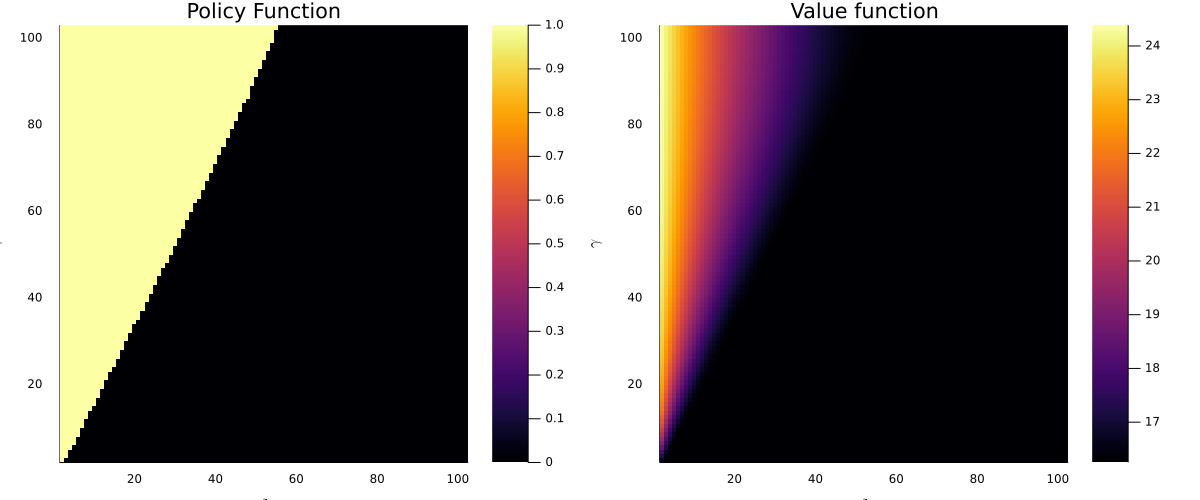

In [10]:
# Figures for the Policy/Value Functions
Plots.savefig(fig,"value_policy_dyn_infty")
fig

The figures below are the fraction of agents trying at $t$ and the hazard rate at $t$.

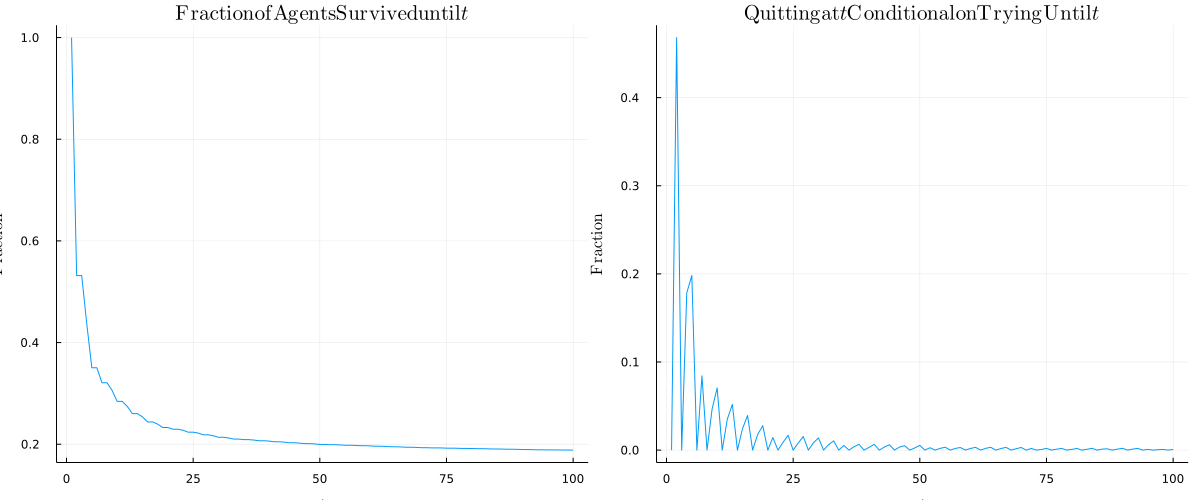

In [11]:
# Figures for Survival/Harard Rates
t = 1:T;
s = vec(sum(dData,dims=1)/N)[1:T];
h = vcat(0, reduce(vcat,(sum(dData[:,t-1])-sum(dData[:,t]))/sum(dData[:,t-1]) for t=2:T));
survival_fig = plot(t,s,lab="Survival rate")
title!(L"\textrm{Fraction of Agents Survived until } t")
xaxis!(L"t")
yaxis!(L"\textrm{Fraction}")
hazard_fig   = plot(t,h,lab="Hazard rate")
title!(L"\textrm{Quitting at } t \textrm{ Conditional on Trying Until } t")
xaxis!(L"t")
yaxis!(L"\textrm{Fraction}")
survival_hazard = plot(survival_fig, hazard_fig, label=["" ""], size=(1200,500))
Plots.savefig(survival_hazard,"survival_hazard_rate")
survival_hazard

### Hazard Rate and MLE

Notation:
- $h_t(\gamma,\delta)$: The probability that a spell ends at $t$ conditional on surviving up to $t$ given the initial state $(\gamma,\delta)$. In other words, the agents started with $(\gamma,\delta)$ and tried inventing up to $t-1$, and decided to quit at $t$.
- $d(\gamma,\delta)$: The decision rule that tells the agent to invent given $(\gamma,\delta)$; i.e., $\mathbf{1}\{v_1(\gamma,\delta)>v_0(\gamma,\delta)\}$.
- S: Tried inventing and succeeded, F: Tried inventing and failed, Q: Quit inventing.

$$
\begin{align*}
    h_1(\gamma,\delta)=&\mathbb{P}(\text{The agent quits at }t=1)\\
        =&\mathbb{E}(1-d(\gamma,\delta))
\end{align*}
$$
We are going to generate the data so that everyone tries inventing at $t=1$, so $h_1(\gamma,\delta)=0$.

$$\begin{align*}
    h_2(\gamma,\delta)=&\mathbb{P}(\text{The agent quits at }t=2|\text{The agent invents until } t=1 )\\
    =&\frac{\mathbb{P}(\text{The agent invents until } t=1 \text{ and quits at }t=2)}{\mathbb{P}(\text{The agent invents until } t=1 )} = \frac{\mathbb{P}(\text{The agent invents until } t=1 \text{ and quits at }t=2)}{1-h_1}\\
    =&\frac{1}{1-h_1}\Bigg(\mathbb{P}(\text{S,Q}) + \mathbb{P}(\text{F,Q})\Bigg)\\
    =&\frac{1}{1-h_1}\Bigg(\frac{\gamma}{\gamma+\delta}d(\gamma,\delta)\Big(1-d(\gamma+1,\delta)\Big)+\frac{\delta}{\gamma+\delta}d(\gamma,\delta)\Big(1-d(\gamma,\delta+1)\Big)\Bigg)
\end{align*}$$

$$
\begin{align*}
    h_3(\gamma,\delta) =&\mathbb{P}(\text{The agent quits at }t=3|\text{The agent invents until } t=2)\\
    =&\frac{\mathbb{P}(\text{The agent invents until } t=2 \text{ and quits at }t=3)}{\mathbb{P}(\text{The agent invents until } t=2 )} = \frac{\mathbb{P}(\text{The agent invents until } t=2 \text{ and quits at }t=3)}{(1-h_1)(1-h_2)}\\
    =&\frac{1}{(1-h_1)(1-h_2)}\Bigg(\mathbb{P}(\text{S,S,Q})+\mathbb{P}(\text{S,F,Q})+\mathbb{P}(\text{F,S,Q})+\mathbb{P}(\text{F,F,Q})\Bigg) \\
    =&\frac{1}{(1-h_1)(1-h_2)}\times\\
    \Bigg(&\frac{\gamma}{\gamma+\delta}\frac{\gamma+1}{\gamma+\delta+1}d(\gamma,\delta)d(\gamma+1,\delta)\Big(1-d(\gamma+2,\delta)\Big)+\\
    &\frac{\gamma}{\gamma+\delta}\frac{\delta}{\gamma+\delta+1}d(\gamma,\delta)d(\gamma+1,\delta)\Big(1-d(\gamma+1,\delta+1)\Big)+\\
    &\frac{\delta}{\gamma+\delta}\frac{\gamma}{\gamma+\delta+1}d(\gamma,\delta)d(\gamma,\delta+1)\Big(1-d(\gamma+1,\delta+1)\Big)+\\
    &\frac{\delta}{\gamma+\delta}\frac{\delta+1}{\gamma+\delta+1}d(\gamma,\delta)d(\gamma,\delta+1)\Big(1-d(\gamma,\delta+2)\Big)\Bigg)
\end{align*}
$$
Notice that at $t=3$, the proportion who tried until $t=2$ is $(1-h_1)(1-h_2)=1-h_2$. Also, the fractions inside represent the proportions of the population of agents who survived until $t=2$ and quits at $t=3$ for every possible history until $t=2$. Directly counting all possible history like this is possible only because the states are discretized. Although the summation will get more complicated, let's do this approach upto $t=5$:

$$
\begin{align*}
    h_4(\gamma,\delta) =& \mathbb{P}(\text{The agent quits at }t=4|\text{The agent invents until }t=3)\\
    =&\frac{\mathbb{P}(\text{The agent invents until }t=3\text{ and quits at }t=4)}{\mathbb{P}(\text{The agent invents until }t=3)} =\frac{\mathbb{P}(\text{The agent invents until }t=3\text{ and quits at }t=4)}{(1-h_1)(1-h_2)(1-h_3)}\\
    =&\frac{1}{(1-h_1)(1-h_2)(1-h_3)}\times\\
    \Bigg(&\frac{\gamma}{\gamma+\delta}\frac{\gamma+1}{\gamma+\delta+1}\frac{\gamma+2}{\gamma+\delta+2}d(\gamma,\delta)d(\gamma+1,\delta)d(\gamma+2,\delta)\Big(1-d(\gamma+3,\delta)\Big)+\\
    &\frac{\gamma}{\gamma+\delta}\frac{\gamma+1}{\gamma+\delta+1}\frac{\delta}{\gamma+\delta+2}d(\gamma,\delta)d(\gamma+1,\delta)d(\gamma+2,\delta)\Big(1-d(\gamma+2,\delta+1)\Big)+\\
    &\frac{\gamma}{\gamma+\delta}\frac{\delta}{\gamma+\delta+1}\frac{\gamma+1}{\gamma+\delta+2}d(\gamma,\delta)d(\gamma+1,\delta)d(\gamma+1,\delta+1)\Big(1-d(\gamma+2,\delta+1)\Big)+\\
    &\frac{\delta}{\gamma+\delta}\frac{\gamma}{\gamma+\delta+1}\frac{\gamma+1}{\gamma+\delta+2}d(\gamma,\delta)d(\gamma,\delta+1)d(\gamma+1,\delta+1)\Big(1-d(\gamma+2,\delta+1)\Big)+\\
    &\frac{\delta}{\gamma+\delta}\frac{\delta+1}{\gamma+\delta+1}\frac{\gamma}{\gamma+\delta+2}d(\gamma,\delta)d(\gamma,\delta+1)d(\gamma,\delta+1)\Big(1-d(\gamma+1,\delta+2)\Big)+\\
    &\frac{\delta}{\gamma+\delta}\frac{\gamma}{\gamma+\delta+1}\frac{\delta+1}{\gamma+\delta+2}d(\gamma,\delta)d(\gamma,\delta+1)d(\gamma+1,\delta+1)\Big(1-d(\gamma+1,\delta+2)\Big)+\\
    &\frac{\gamma}{\gamma+\delta}\frac{\delta}{\gamma+\delta+1}\frac{\delta+1}{\gamma+\delta+2}d(\gamma,\delta)d(\gamma+1,\delta)d(\gamma+1,\delta+1)\Big(1-d(\gamma+1,\delta+2)\Big)+\\
    &\frac{\gamma}{\gamma+\delta}\frac{\gamma+1}{\gamma+\delta+1}\frac{\gamma+2}{\gamma+\delta+2}d(\gamma,\delta)d(\gamma,\delta+1)d(\gamma,\delta+2)\Big(1-d(\gamma,\delta+3)\Big)\Bigg)
\end{align*}
$$

$$
\begin{align*}
    h_5(\gamma,\delta) =& \mathbb{P}(\text{The agent quits at }t=5|\text{The agent invents until }t=4) \\
    =&\frac{\mathbb{P}(\text{The agent invents until }t=4\text{ and quits at }t=5)}{\mathbb{P}(\text{The agent invents until }t=4)} = \frac{\mathbb{P}(\text{The agent invents until }t=4\text{ and quits at }t=5)}{(1-h_1)(1-h_2)(1-h_3)(1-h_4)}\\
    =&\frac{1}{(1-h_1)(1-h_2)(1-h_3)(1-h_4)}\times\\
    \Bigg(&\frac{\gamma}{\gamma+\delta}\frac{\gamma+1}{\gamma+\delta+1}\frac{\gamma+2}{\gamma+\delta+2}\frac{\gamma+3}{\gamma+\delta+3}
        d(\gamma,\delta)d(\gamma+1,\delta)d(\gamma+2,\delta)d(\gamma+3,\delta)\Big(1-d(\gamma+4,\delta)\Big)+\\
        
    &\frac{\gamma}{\gamma+\delta}\frac{\gamma+1}{\gamma+\delta+1}\frac{\gamma+2}{\gamma+\delta+2}\frac{\delta}{\gamma+\delta+3}
        d(\gamma,\delta)d(\gamma+1,\delta)d(\gamma+2,\delta)d(\gamma+3,\delta)\Big(1-d(\gamma+3,\delta+1)\Big)+\\
    &\frac{\gamma}{\gamma+\delta}\frac{\gamma+1}{\gamma+\delta+1}\frac{\delta}{\gamma+\delta+2}\frac{\gamma+2}{\gamma+\delta+3}
        d(\gamma,\delta)d(\gamma+1,\delta)d(\gamma+2,\delta)d(\gamma+2,\delta+1)\Big(1-d(\gamma+3,\delta+1)\Big)+\\
    &\frac{\gamma}{\gamma+\delta}\frac{\delta}{\gamma+\delta+1}\frac{\gamma+1}{\gamma+\delta+2}\frac{\gamma+2}{\gamma+\delta+3}
        d(\gamma,\delta)d(\gamma+1,\delta)d(\gamma+1,\delta+1)d(\gamma+2,\delta+1)\Big(1-d(\gamma+3,\delta+1)\Big)+\\
    &\frac{\delta}{\gamma+\delta}\frac{\gamma}{\gamma+\delta+1}\frac{\gamma+1}{\gamma+\delta+2}\frac{\gamma+2}{\gamma+\delta+3}
        d(\gamma,\delta)d(\gamma,\delta+1)d(\gamma+1,\delta+1)d(\gamma+2,\delta+1)\Big(1-d(\gamma+3,\delta+1)\Big)+\\

    &\frac{\gamma}{\gamma+\delta}\frac{\gamma+1}{\gamma+\delta+1}\frac{\delta}{\gamma+\delta+2}\frac{\delta+1}{\gamma+\delta+3}
        d(\gamma,\delta)d(\gamma+1,\delta)d(\gamma+2,\delta)d(\gamma+2,\delta+1)\Big(1-d(\gamma+2,\delta+2)\Big)+\\
    &\frac{\gamma}{\gamma+\delta}\frac{\delta}{\gamma+\delta+1}\frac{\gamma+1}{\gamma+\delta+2}\frac{\delta+1}{\gamma+\delta+3}
        d(\gamma,\delta)d(\gamma+1,\delta)d(\gamma+1,\delta+1)d(\gamma+2,\delta+1)\Big(1-d(\gamma+2,\delta+2)\Big)+\\
    &\frac{\gamma}{\gamma+\delta}\frac{\delta}{\gamma+\delta+1}\frac{\delta+1}{\gamma+\delta+2}\frac{\gamma+1}{\gamma+\delta+3}
        d(\gamma,\delta)d(\gamma+1,\delta)d(\gamma+1,\delta+1)d(\gamma+1,\delta+2)\Big(1-d(\gamma+2,\delta+2)\Big)+\\
    &\frac{\delta}{\gamma+\delta}\frac{\delta+1}{\gamma+\delta+1}\frac{\gamma}{\gamma+\delta+2}\frac{\gamma+1}{\gamma+\delta+3}
        d(\gamma,\delta)d(\gamma,\delta+1)d(\gamma,\delta+2)d(\gamma+1,\delta+2)\Big(1-d(\gamma+2,\delta+2)\Big)+\\
    &\frac{\delta}{\gamma+\delta}\frac{\gamma}{\gamma+\delta+1}\frac{\delta+1}{\gamma+\delta+2}\frac{\gamma+1}{\gamma+\delta+3}
        d(\gamma,\delta)d(\gamma,\delta+1)d(\gamma+1,\delta+1)d(\gamma+1,\delta+2)\Big(1-d(\gamma+2,\delta+2)\Big)+\\
    &\frac{\delta}{\gamma+\delta}\frac{\gamma}{\gamma+\delta+1}\frac{\gamma+1}{\gamma+\delta+2}\frac{\delta+1}{\gamma+\delta+3}
        d(\gamma,\delta)d(\gamma,\delta+1)d(\gamma+1,\delta+1)d(\gamma+2,\delta+1)\Big(1-d(\gamma+2,\delta+2)\Big)+\\

    &\frac{\gamma}{\gamma+\delta}\frac{\delta}{\gamma+\delta+1}\frac{\delta+1}{\gamma+\delta+2}\frac{\delta+2}{\gamma+\delta+3}
        d(\gamma,\delta)d(\gamma+1,\delta)d(\gamma+1,\delta+1)d(\gamma+1,\delta+2)\Big(1-d(\gamma+1,\delta+3)\Big)+\\
    &\frac{\delta}{\gamma+\delta}\frac{\gamma}{\gamma+\delta+1}\frac{\delta+1}{\gamma+\delta+2}\frac{\delta+2}{\gamma+\delta+3}
        d(\gamma,\delta)d(\gamma,\delta+1)d(\gamma+1,\delta+1)d(\gamma+1,\delta+2)\Big(1-d(\gamma+1,\delta+3)\Big)+\\
    &\frac{\delta}{\gamma+\delta}\frac{\delta+1}{\gamma+\delta+1}\frac{\gamma}{\gamma+\delta+2}\frac{\delta+2}{\gamma+\delta+3}
        d(\gamma,\delta)d(\gamma,\delta+1)d(\gamma,\delta+2)d(\gamma+1,\delta+2)\Big(1-d(\gamma+1,\delta+3)\Big)+\\
    &\frac{\delta}{\gamma+\delta}\frac{\delta+1}{\gamma+\delta+1}\frac{\delta+2}{\gamma+\delta+2}\frac{\gamma}{\gamma+\delta+3}
        d(\gamma,\delta)d(\gamma,\delta+1)d(\gamma,\delta+2)d(\gamma,\delta+3)\Big(1-d(\gamma+1,\delta+3)\Big)+\\

    &\frac{\delta}{\gamma+\delta}\frac{\delta+1}{\gamma+\delta+1}\frac{\delta+2}{\gamma+\delta+2}\frac{\delta+3}{\gamma+\delta+3}
        d(\gamma,\delta)d(\gamma,\delta+1)d(\gamma,\delta+2)d(\gamma,\delta+3)\Big(1-d(\gamma,\delta+4)\Big)\Bigg) 
\end{align*}
$$

Let's wrap this into a function and call it `hazard`:

In [12]:
@everywhere function hazard(d, γ, δ)
    h₁ = 1-d[1,1]
    h₂ = 1/(1-h₁) * (
            d[1,1] * γ/(γ+δ) * (1-d[2,1]) +
            d[1,1] * δ/(γ+δ) * (1-d[1,2])
        ) 
    h₃ = 1/(1-h₁) * 1/(1-h₂) * (
            d[1,1] * γ/(γ+δ) * d[2,1] * (γ+1)/(γ+δ+1) * (1-d[3,1])    +
            d[1,1] * γ/(γ+δ) * d[2,1] * (δ  )/(γ+δ+1) * (1-d[2,2])    + 
            d[1,1] * δ/(γ+δ) * d[1,2] * (γ  )/(γ+δ+1) * (1-d[2,2])    +
            d[1,1] * δ/(γ+δ) * d[1,2] * (δ+1)/(γ+δ+1) * (1-d[1,3])
        ) 
    h₄ = 1/(1-h₁) * 1/(1-h₂) * 1/(1-h₃) * (
            d[1,1] * γ/(γ+δ) * d[2,1] * (γ+1)/(γ+δ+1) * d[3,1] * (γ+2)/(γ+δ+2) * (1-d[4,1]) +
            
            d[1,1] * γ/(γ+δ) * d[2,1] * (γ+1)/(γ+δ+1) * d[3,1] * (δ  )/(γ+δ+2) * (1-d[3,2]) +
            d[1,1] * γ/(γ+δ) * d[2,1] * (δ  )/(γ+δ+1) * d[2,2] * (γ+1)/(γ+δ+2) * (1-d[3,2]) +
            d[1,1] * δ/(γ+δ) * d[1,2] * (γ  )/(γ+δ+1) * d[2,2] * (γ+1)/(γ+δ+2) * (1-d[3,2]) +
    
            d[1,1] * δ/(γ+δ) * d[1,2] * (δ+1)/(γ+δ+1) * d[1,3] * (γ  )/(γ+δ+2) * (1-d[2,3]) +
            d[1,1] * δ/(γ+δ) * d[1,2] * (γ  )/(γ+δ+1) * d[2,2] * (δ+1)/(γ+δ+2) * (1-d[2,3]) +
            d[1,1] * γ/(γ+δ) * d[2,1] * (δ  )/(γ+δ+1) * d[2,2] * (δ+1)/(γ+δ+2) * (1-d[2,3]) +
    
            d[1,1] * δ/(γ+δ) * d[1,2] * (δ+1)/(γ+δ+1) * d[1,3] * (δ+2)/(γ+δ+2) * (1-d[1,4])
        )
    h₅ = 1/(1-h₂) * 1/(1-h₃) * 1/(1-h₄)*(
        d[1,1] * γ/(γ+δ) * d[2,1] * (γ+1)/(γ+δ+1) * d[3,1] * (γ+2)/(γ+δ+2) * d[4,1] * (γ+3)/(γ+δ+3) * (1-d[5,1]) +
            
        d[1,1] * γ/(γ+δ) * d[2,1] * (γ+1)/(γ+δ+1) * d[3,1] * (γ+2)/(γ+δ+2) * d[4,1] * (δ  )/(γ+δ+3) * (1-d[4,2]) + 
        d[1,1] * γ/(γ+δ) * d[2,1] * (γ+1)/(γ+δ+1) * d[3,1] * (δ  )/(γ+δ+2) * d[3,2] * (γ+2)/(γ+δ+3) * (1-d[4,2]) + 
        d[1,1] * γ/(γ+δ) * d[2,1] * (δ  )/(γ+δ+1) * d[2,2] * (γ+1)/(γ+δ+2) * d[3,2] * (γ+2)/(γ+δ+3) * (1-d[4,2]) + 
        d[1,1] * δ/(γ+δ) * d[1,2] * (γ  )/(γ+δ+1) * d[2,2] * (γ+1)/(γ+δ+2) * d[3,2] * (γ+2)/(γ+δ+3) * (1-d[4,2]) +
    
        d[1,1] * γ/(γ+δ) * d[2,1] * (γ+1)/(γ+δ+1) * d[3,1] * (δ  )/(γ+δ+2) * d[3,2] * (δ+1)/(γ+δ+3) * (1-d[3,3]) + 
        d[1,1] * γ/(γ+δ) * d[2,1] * (δ  )/(γ+δ+1) * d[2,2] * (γ+1)/(γ+δ+2) * d[3,2] * (δ+1)/(γ+δ+3) * (1-d[3,3]) + 
        d[1,1] * γ/(γ+δ) * d[2,1] * (δ  )/(γ+δ+1) * d[2,2] * (δ+1)/(γ+δ+2) * d[2,3] * (γ+1)/(γ+δ+3) * (1-d[3,3]) + 
        d[1,1] * δ/(γ+δ) * d[1,2] * (δ+1)/(γ+δ+1) * d[1,3] * (γ  )/(γ+δ+2) * d[2,3] * (γ+1)/(γ+δ+3) * (1-d[3,3]) + 
        d[1,1] * δ/(γ+δ) * d[1,2] * (γ  )/(γ+δ+1) * d[2,2] * (δ+1)/(γ+δ+2) * d[2,3] * (γ+1)/(γ+δ+3) * (1-d[3,3]) + 
        d[1,1] * δ/(γ+δ) * d[1,2] * (γ  )/(γ+δ+1) * d[2,2] * (γ+1)/(γ+δ+2) * d[3,2] * (δ+1)/(γ+δ+3) * (1-d[3,3]) +
    
        d[1,1] * γ/(γ+δ) * d[2,1] * (δ  )/(γ+δ+1) * d[2,2] * (δ+1)/(γ+δ+2) * d[2,3] * (δ+2)/(γ+δ+3) * (1-d[2,4]) + 
        d[1,1] * δ/(γ+δ) * d[1,2] * (γ  )/(γ+δ+1) * d[2,2] * (δ+1)/(γ+δ+2) * d[2,3] * (δ+2)/(γ+δ+3) * (1-d[2,4]) + 
        d[1,1] * δ/(γ+δ) * d[1,2] * (δ+1)/(γ+δ+1) * d[1,3] * (γ  )/(γ+δ+2) * d[2,3] * (δ+2)/(γ+δ+3) * (1-d[2,4]) + 
        d[1,1] * δ/(γ+δ) * d[1,2] * (δ+1)/(γ+δ+1) * d[1,3] * (δ+2)/(γ+δ+2) * d[1,4] * (γ  )/(γ+δ+3) * (1-d[2,4]) +
        
        d[1,1] * δ/(γ+δ) * d[1,2] * (δ+1)/(γ+δ+1) * d[1,3] * (δ+2)/(γ+δ+2) * d[1,4] * (δ+3)/(γ+δ+3) * (1-d[1,5])
    )
      return h₁, h₂, h₃, h₄, h₅
end;

Now we are ready to use these hazard rates and do MLE like in the two-period model. The sample comprises a cross section of spells $i\in\{1,\ldots,N\}$, some of which are completed at $\tau_i$, and some of which are incomplete lasting at least $T$ periods. Let $p_{\tau}(\gamma;\delta)$ denote the unconditional probability of individual $i$ with parameters $(\gamma,\delta)$ inventing for $\tau-1$ periods and stop inventing at $\tau$ if spell is complete and the unconditional probability of individual $i$ inventing for at least $\tau$ periods if spell is incomplete:

$$
p_{i}(\gamma;\delta) := \begin{cases}
    h_{\tau_i}(\gamma,\delta)\prod_{s=1}^{\tau_i-1}(1-h_s(\gamma,\delta)) &\text{ if spell is complete}\\
    \prod_{s=1}^{T}(1-h_s(\gamma,\delta)) & \text{ if spell is incomplete}
    \end{cases}
$$
The likelihood is then:
$$\begin{align*}
    \mathcal{L}&=\prod_{i=1}^{N}p_{\tau_i}(\gamma;\delta)\\
    \log\mathcal{L}&=\sum_{i=1}^{N}\log p_{\tau_i}(\gamma;\delta)
\end{align*}$$

While we are playing with this model, we can think about this question: how much do our MLE estimates improve as i) N increases and ii) T increases in our data? If we have more information about what agents do in the future, can we estimate our parameter better? In order to see this, I will form the log-likelihood supposing that we have data up to $t=2,3,4,5$.

In [13]:
@everywhere function logLikelihood_infty(log_γ,δ,w,β,T,qData,time)
      γ = exp(log_γ[1])
      v₀, v₁, _, _, _= VFI(γ,δ,w,β,T,print_flag=0);
      h₁, h₂, h₃, h₄, h₅ = hazard(d, γ, δ)
      if time ==2 
            return -sum(log.((qData.==0).*(  h₁) .+ 
                             (qData.==1).*(1-h₁).*(  h₂) .+ 
                             (qData.==2).*(1-h₁).*(1-h₂)))
      elseif time ==3
            return -sum(log.((qData.==0).*(  h₁) .+ 
                             (qData.==1).*(1-h₁).*(  h₂) .+ 
                             (qData.==2).*(1-h₁).*(1-h₂).*(  h₃) .+ 
                             (qData.==3).*(1-h₁).*(1-h₂).*(1-h₃)))
      elseif time ==4
            return -sum(log.((qData.==0).*(  h₁) .+ 
                             (qData.==1).*(1-h₁).*(  h₂) .+ 
                             (qData.==2).*(1-h₁).*(1-h₂).*(  h₃) .+
                             (qData.==3).*(1-h₁).*(1-h₂).*(1-h₃).*(  h₄) .+
                             (qData.==4).*(1-h₁).*(1-h₂).*(1-h₃).*(1-h₄))) 
      else # time ==5 
            return -sum(log.((qData.==0).*(  h₁) .+ 
                             (qData.==1).*(1-h₁).*(  h₂) .+ 
                             (qData.==2).*(1-h₁).*(1-h₂).*(  h₃) .+
                             (qData.==3).*(1-h₁).*(1-h₂).*(1-h₃).*(  h₄) .+
                             (qData.==4).*(1-h₁).*(1-h₂).*(1-h₃).*(1-h₄).*(  h₅) .+
                             (qData.==5).*(1-h₁).*(1-h₂).*(1-h₃).*(1-h₄).*(1-h₅)))
      end
end;

In [14]:
@everywhere function simul_data_infty(N,T,γ,δ,d,Tdata)
    # N: the number of agents
    # T: the time horizon we wish to do VFI
    # γ, δ: structural parameters
    # d: decision rule
    # Tdata: the last time period we wish to simulate data
    γData = Array{Float64}(zeros(N,Tdata));
    δData = Array{Float64}(zeros(N,Tdata));
    dData = Array{Float64}(zeros(N,Tdata));
    xData = Array{Float64}(zeros(N,Tdata));
    ξ = rand(Beta(γ,δ),N);
    
    γData[:,1] .= γ
    δData[:,1] .= δ
    γ_init = Int(floor(γ))-1
    δ_init = Int(floor(δ))-1
    
    function decision(γ,δ,γ_init,δ_init)
        γ = Int(floor(γ))
        δ = Int(floor(δ))
        return d[γ-γ_init,δ-δ_init]
    end
    
    dData[:,1] = broadcast(decision,γData[:,1],δData[:,1],γ_init,δ_init)
    xData[:,1] = rand.(Bernoulli.(ξ)) .* dData[:,1];

    for t=2:Tdata
        γData[:,t] = (dData[:,t-1].==1) .* ((γData[:,t-1].< γ+T) .* (γData[:,t-1] .+ 1 .* xData[:,t-1]) .+ (γData[:,t-1].>= γ+T) .* γData[:,t-1]) +
                     (dData[:,t-1].==0) .* γData[:,t-1]
        δData[:,t] = (dData[:,t-1].==1) .* ((δData[:,t-1].< δ+T) .* (δData[:,t-1] .+ 1 .* (1 .- xData[:,t-1]))  .+ (δData[:,t-1].>= δ+T) .* δData[:,t-1]) +
                     (dData[:,t-1].==0) .* δData[:,t-1]
        dData[:,t] = broadcast(decision,γData[:,t],δData[:,t],γ_init,δ_init)
        xData[:,t] = rand.(Bernoulli.(ξ)) .* dData[:,t];
    end

    return γData, δData, dData, xData, ξ

end;

In [15]:
N_vec = [500,5_000,50_000,500_000,5_000_000];Tdata=5;
_, _, dData, _, _ = simul_data_infty(N_vec[end],T,γ,δ,d,Tdata);
h_vec = hazard(d, γ, δ)

@everywhere begin
    γ=2.3;δ=2.0;w=0.65;β=0.96;T=100;
    v₀, v₁, V, d, _ = VFI(γ,δ,w,β,T,print_flag=0);
    Random.seed!(42)    
    deviation = randn()
    γ_init = [log(γ+deviation/2)]
    lb, ub = log(0.1), log(γ+abs(deviation+2))
    lb_ub = TwiceDifferentiableConstraints([lb],[ub]);
end

h_rate_infty = SharedArray{Float64}(zeros(length(N_vec),4));
result_infty = SharedArray{Float64}(zeros(length(N_vec),4,2));

@time @sync @distributed for i = 1:length(N_vec)
    N = N_vec[i]
    h_rate_infty[i,1] = sum((dData[1:N,1].==1).&(dData[1:N,2].==0))/sum((dData[1:N,1].==1))
    h_rate_infty[i,2] = sum((dData[1:N,2].==1).&(dData[1:N,3].==0))/sum((dData[1:N,2].==1))
    h_rate_infty[i,3] = sum((dData[1:N,3].==1).&(dData[1:N,4].==0))/sum((dData[1:N,3].==1))
    h_rate_infty[i,4] = sum((dData[1:N,4].==1).&(dData[1:N,5].==0))/sum((dData[1:N,4].==1))
    for t = 2:Tdata
        qData = sum(dData[1:N,1:t],dims=2);
        func = TwiceDifferentiable(γ -> logLikelihood_infty(γ[1],δ,w,β,T,qData,t),[γ]);
        opt = optimize(func, lb_ub, γ_init, IPNewton())
        @printf("N=%7i using information up to t=%1i is done! \n",N,t)
        γ_hat_optim = exp(opt.minimizer[1])
        σ_hat_optim = sqrt(inv(hessian!(func,opt.minimizer)))[1]
        result_infty[i,t-1,1] = γ_hat_optim
        result_infty[i,t-1,2] = σ_hat_optim
    end
end

      From worker 4:	N=  50000 using information up to t=2 is done! 
      From worker 3:	N=   5000 using information up to t=2 is done! 
      From worker 2:	N=    500 using information up to t=2 is done! 
      From worker 6:	N=5000000 using information up to t=2 is done! 
      From worker 4:	N=  50000 using information up to t=3 is done! 
      From worker 5:	N= 500000 using information up to t=2 is done! 
      From worker 3:	N=   5000 using information up to t=3 is done! 
      From worker 4:	N=  50000 using information up to t=4 is done! 
      From worker 2:	N=    500 using information up to t=3 is done! 
      From worker 6:	N=5000000 using information up to t=3 is done! 
      From worker 3:	N=   5000 using information up to t=4 is done! 
      From worker 2:	N=    500 using information up to t=4 is done! 
      From worker 5:	N= 500000 using information up to t=3 is done! 
      From worker 4:	N=  50000 using information up to t=5 is done! 
      From worker 3:	N=   5000 usi

Task (done) @0x00000000873983f0

In [23]:
# Print MLE estimation results
print("------------ Estimating γ in an Infinite Horizon Model -------------\n")
print("Parameters: γ=$γ, δ=$δ, w=$w, β=$β \n")
@printf("Initial Point: %1.4f, Lower bound  : %1.4f, Upper bound: %1.4f \n", exp(γ_init[1]), exp(lb), exp(ub))
@printf("Hazard Rate: Data vs Theory \n")
print("=====================================================================\n")
@printf("N     ||"); [@printf(" %7i |", i) for i in N_vec]; @printf("|  Theory |\n") 
print("---------------------------------------------------------------------\n")
for t=1:4
    print("h$(t+1)    ||"); [@printf(" %1.5f |", i) for i in h_rate_infty[:,t]]; @printf("| %1.5f |\n",h_vec[t+1])
end
print("=====================================================================\n")
@printf("Estimation Result: \n")
print("==============================================================\n")
@printf("Data \\ N  ||"); [@printf(" %7i |", i) for i in N_vec]; @printf("\n")
print("--------------------------------------------------------------\n")
for t = 1:4
    print("Up to t=$(t+1) ||"); [@printf(" %1.5f |", i) for i in result_infty[:,t,1]]; @printf("\n")
    print("          ||"); [@printf("(%1.5f)|", i) for i in result_infty[:,t,2]]; @printf("\n")
end
print("==============================================================\n")
@printf("Standard errors in parentheses.")

------------ Estimating γ in an Infinite Horizon Model -------------
Parameters: γ=2.3, δ=2.0, w=0.65, β=0.96 
Initial Point: 2.6942, Lower bound  : 0.1000, Upper bound: 5.0884 
Hazard Rate: Data vs Theory 
N     ||     500 |    5000 |   50000 |  500000 | 5000000 ||  Theory |
---------------------------------------------------------------------
h2    || 0.45400 | 0.47060 | 0.46274 | 0.46459 | 0.46495 || 0.46512 |
h3    || 0.00000 | 0.00000 | 0.00000 | 0.00000 | 0.00000 || 0.00000 |
h4    || 0.16484 | 0.18209 | 0.17950 | 0.17929 | 0.17972 || 0.17969 |
h5    || 0.19737 | 0.20554 | 0.19577 | 0.19744 | 0.19835 || 0.19805 |
Estimation Result: 
Data \ N  ||     500 |    5000 |   50000 |  500000 | 5000000 |
--------------------------------------------------------------
Up to t=2 || 2.40529 | 2.24989 | 2.32208 | 2.30491 | 2.30152 |
          ||(0.08982)|(0.02833)|(0.00897)|(0.00284)|(0.00090)|
Up to t=3 || 2.40529 | 2.24989 | 2.32208 | 2.30491 | 2.30152 |
          ||(0.08982)|(0.02833)|(0.008

As $N$ increases, we see that our empirical hazard rates approach to the theoretical quantity. The estimation result table show that:
  1. holding constant the available information across time, the MLE estimates tend to the true value as the number of observations increase and 
  1. holding the number of observations constant, using more information on the agents choices across time helps efficiency.
   
It is also interesting to see that using information up to $t=3$ does not have any improvement on the estimates compared to using information up to $t=2$. This is because no one quits at $t=3$; thus, there is no information to use for our estimation there.

### Appendix: Sanity check for simulation for the infinite horizon model

In [25]:
γ=2.3;δ=2.0;w=0.65;β=0.96;T=100;
N=5000;iter=50000;Tdata=5;
v₀, v₁, V, d, _ = VFI(γ,δ,w,β,T,print_flag=0);
h_vec_check = hazard(d, γ, δ)
h_rate_simul=SharedArray{Float64}(zeros(iter,4))
Random.seed!(42)
@time @sync @distributed for n = 1:iter
    γData, δData, dData, xData, ξ = simul_data_infty(N,T,γ,δ,d,Tdata);
    for t = 1:4
        h_rate_simul[n,t] = sum((dData[:,t].==1).&(dData[:,t+1].==0))/sum((dData[:,t].==1))
    end
end;

 83.480044 seconds (77.91 k allocations: 4.122 MiB, 0.06% compilation time)


In [26]:
# Checking whether the simulation is sensible
print("--- Validating the Simulation of $N Observations with $iter Iterations ---\n")
for t in 1:4
    print("h$(t+1) ");@printf("%3.6f, h2_data: %3.6f \n",h_vec_check[t+1],mean(h_rate_simul[:,t]))
end

--- Validating the Simulation of 5000 Observations with 50000 Iterations ---
h2 0.465116, h2_data: 0.465092 
h3 0.000000, h2_data: 0.000000 
h4 0.179695, h2_data: 0.179677 
h5 0.198052, h2_data: 0.198025 
